In [26]:
from astropy.table import Table, Column
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
from seaborn import pairplot 
# Assuming you have located the table fits file in the same directory 
tab = Table.read('DR16Q_v4.fits')
tab.colnames

['SDSS_NAME',
 'RA',
 'DEC',
 'PLATE',
 'MJD',
 'FIBERID',
 'AUTOCLASS_PQN',
 'AUTOCLASS_DR14Q',
 'IS_QSO_QN',
 'Z_QN',
 'RANDOM_SELECT',
 'Z_10K',
 'Z_CONF_10K',
 'PIPE_CORR_10K',
 'IS_QSO_10K',
 'THING_ID',
 'Z_VI',
 'Z_CONF',
 'CLASS_PERSON',
 'Z_DR12Q',
 'IS_QSO_DR12Q',
 'Z_DR7Q_SCH',
 'IS_QSO_DR7Q',
 'Z_DR6Q_HW',
 'Z_DR7Q_HW',
 'IS_QSO_FINAL',
 'Z',
 'SOURCE_Z',
 'Z_PIPE',
 'ZWARNING',
 'OBJID',
 'Z_PCA',
 'ZWARN_PCA',
 'DELTACHI2_PCA',
 'Z_HALPHA',
 'ZWARN_HALPHA',
 'DELTACHI2_HALPHA',
 'Z_HBETA',
 'ZWARN_HBETA',
 'DELTACHI2_HBETA',
 'Z_MGII',
 'ZWARN_MGII',
 'DELTACHI2_MGII',
 'Z_CIII',
 'ZWARN_CIII',
 'DELTACHI2_CIII',
 'Z_CIV',
 'ZWARN_CIV',
 'DELTACHI2_CIV',
 'Z_LYA',
 'ZWARN_LYA',
 'DELTACHI2_LYA',
 'Z_LYAWG',
 'Z_DLA',
 'NHI_DLA',
 'CONF_DLA',
 'BAL_PROB',
 'BI_CIV',
 'ERR_BI_CIV',
 'AI_CIV',
 'ERR_AI_CIV',
 'BI_SIIV',
 'ERR_BI_SIIV',
 'AI_SIIV',
 'ERR_AI_SIIV',
 'BOSS_TARGET1',
 'EBOSS_TARGET0',
 'EBOSS_TARGET1',
 'EBOSS_TARGET2',
 'ANCILLARY_TARGET1',
 'ANCILLARY_TARGET2'

Parametre to use:
['THING_ID',
 'Z',
 'ZWARNING',
 'Z_HALPHA',
 'ZWARN_HALPHA',
 'DELTACHI2_HALPHA',
 'Z_HBETA',
 'ZWARN_HBETA',
 'DELTACHI2_HBETA',
 'Z_MGII',
 'ZWARN_MGII',
 'DELTACHI2_MGII',
 'Z_CIII',
 'ZWARN_CIII',
 'DELTACHI2_CIII',
 'Z_CIV',
 'ZWARN_CIV',
 'DELTACHI2_CIV',
 'Z_LYA',
 'ZWARN_LYA',
 'DELTACHI2_LYA',
 'Z_LYAWG',
 'Z_DLA',
 'NHI_DLA',
 'CONF_DLA',
 'BAL_PROB',
 'BI_CIV',
 'ERR_BI_CIV',
 'AI_CIV',
 'ERR_AI_CIV',
 'BI_SIIV',
 'ERR_BI_SIIV',
 'AI_SIIV',
 'ERR_AI_SIIV',
 'PLATESN2',
 'PSFFLUX',
 'PSFFLUX_IVAR',
 'psfflux',
 'psffluxERR',
 'EXTINCTION',
 'M_I',
 'SN_MEDIAN_ALL']

In [27]:
# You can check out what is the meaning of each parametr here: 
# https://data.sdss.org/datamodel/files/BOSS_QSO/DR16Q/DR16Q_v4.html

In [33]:
# loading required features 

#  SDSS fluxes 
psfflux = np.array(tab['PSFFLUX'])
Fu = psfflux[:,0]
Fg = psfflux[:,1]
Fr = psfflux[:,2]
Fi = psfflux[:,3]
Fz = psfflux[:,4]

#  SDSS flux inverse variance
psfflux_ivar = tab['PSFFLUX_IVAR']
Fu_ivar = psfflux_ivar[:,0]
Fg_ivar = psfflux_ivar[:,1]
Fr_ivar = psfflux_ivar[:,2]
Fi_ivar = psfflux_ivar[:,3]
Fz_ivar = psfflux_ivar[:,4]

# #  SDSS Mag
# psfmag = np.array(tab['PSFMAG'])
# u = psfmag[:,0]
# g = psfmag[:,1]
# r = psfmag[:,2]
# i = psfmag[:,3]
# z = psfmag[:,4]

# WISE fluxes
W1_Flux = tab['W1_FLUX']
W2_Flux = tab['W2_FLUX']

# Wise Flux inverse variance 
W1_Flux_ivar = tab['W1_FLUX_IVAR']
W2_Flux_ivar = tab['W2_FLUX_IVAR']

#  Other features 
redshift = tab['Z']
zwarning = tab['ZWARNING']


In [32]:

StandardScaler().fit_transform(data)
print(scaled_Fu_ivar)

ValueError: Expected 2D array, got 1D array instead:
array=[1. 2. 3.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [58]:
mask = (Fu>0) & (Fg>0) & (Fr>0) & (Fi>0) &(Fz>0) & (Fu_ivar>.1) & (Fg_ivar>.1) & (Fr_ivar>.1) & (Fi_ivar>.1) & (Fz_ivar>.1) & (redshift>0) & (zwarning==0)   & (W1_Flux>0) & (W2_Flux>0) &(W1_Flux_ivar>0.0002) & (W2_Flux_ivar>0.0002)
print(sum(mask))
print(min(redshift[mask]), max(redshift[mask]), np.median(redshift[mask]))

607430
0.0009571631671860814 7.023917198181152 1.736539602279663


In [59]:
#  SDSS-SDSS flux ratios
Fug = np.log(Fu[mask]/Fg[mask])
Fur = np.log(Fu[mask]/Fr[mask])
Fui = np.log(Fu[mask]/Fi[mask])
Fuz = np.log(Fu[mask]/Fz[mask])
Fgr = np.log(Fg[mask]/Fr[mask])
Fgi = np.log(Fg[mask]/Fi[mask])
Fgz = np.log(Fg[mask]/Fz[mask])
Fri = np.log(Fr[mask]/Fi[mask])
Frz = np.log(Fr[mask]/Fz[mask])
Fiz = np.log(Fi[mask]/Fz[mask])

# WISE-WISE flux ratios
FW1W2 = np.log(W1_Flux[mask]/W2_Flux[mask])

# SDSS-WISE flux ratios
FuW1 = np.log(Fu[mask]/W1_Flux[mask])
FuW2 = np.log(Fu[mask]/W2_Flux[mask])
FgW1 = np.log(Fg[mask]/W1_Flux[mask])
FgW2 = np.log(Fg[mask]/W2_Flux[mask])
FrW1 = np.log(Fr[mask]/W1_Flux[mask])
FrW2 = np.log(Fr[mask]/W2_Flux[mask])
FiW1 = np.log(Fi[mask]/W1_Flux[mask])
FiW2 = np.log(Fi[mask]/W2_Flux[mask])
FzW1 = np.log(Fz[mask]/W1_Flux[mask])
FzW2 = np.log(Fz[mask]/W2_Flux[mask])

In [61]:
data = np.array(list(zip(Fug, Fur, Fui, Fuz,Fgr,Fgi,Fgz,Fri,Frz,Fiz, FW1W2,FuW1,
                        FgW1, FrW1, FiW1, FzW1, FuW2, FgW2, FrW2, FiW2, FzW2)))
data_scaled = StandardScaler().fit_transform(data)

In [ ]:
df = pd.DataFrame(data=data_scaled, columns=['Fug', 'Fur', 'Fui', 'Fuz','Fgr','Fgi','Fgz','Fri','Frz','Fiz', 'FW1W2','FuW1',
                        'FgW1', 'FrW1', 'FiW1', 'FzW1', 'FuW2', 'FgW2', 'FrW2', 'FiW2', 'FzW2'])
sns_plot = pairplot(df, corner=True, vars=['Fug','Fur','Fui','Fgr','Fgi'])
sns_plot.savefig('sdss_scaled_plot.png', dpi=1800)

In [63]:
sns_plot = pairplot(df, corner=True, vars=[ 'FrW1', 'FiW1', 'FzW1', 'FuW2'])
sns_plot.savefig('rw1-iw1-zw1-uw1-scaled-pair_plot.png', dpi=1800)

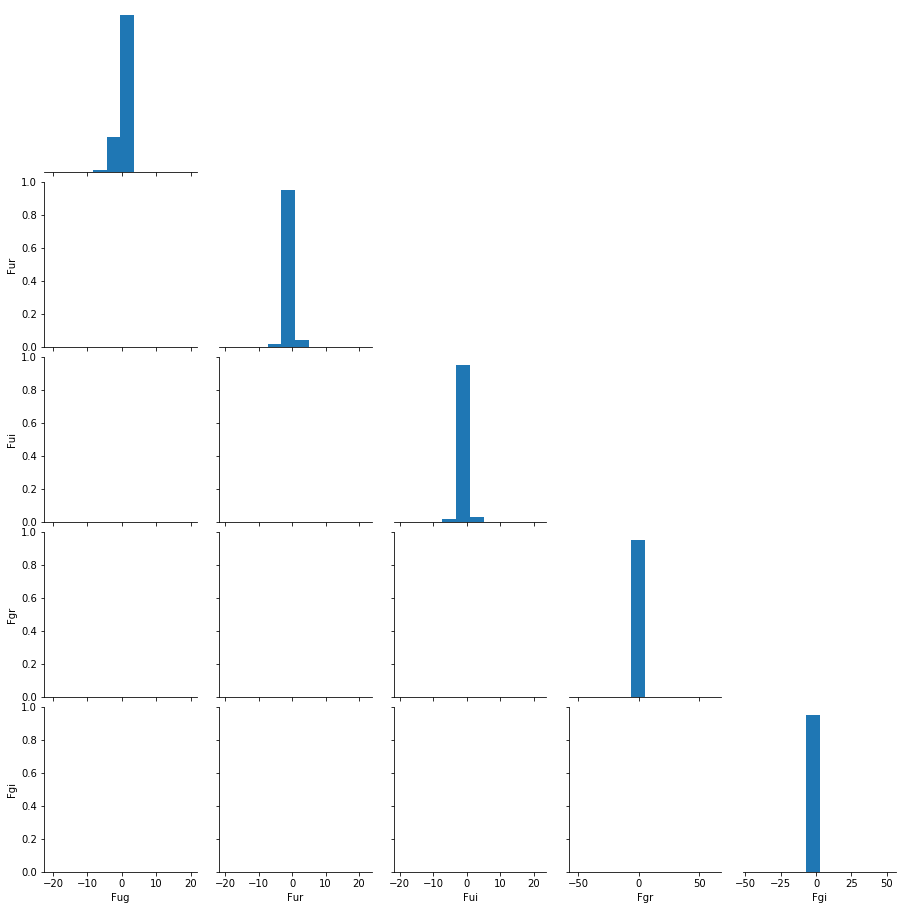

In [64]:
sns_plot = pairplot(df, corner=True, vars=['Fug','Fur','Fui','Fgr','Fgi'], kind='kde')
sns_plot.savefig('sdss_scaled_kde-pair-plot.png', dpi=1800)

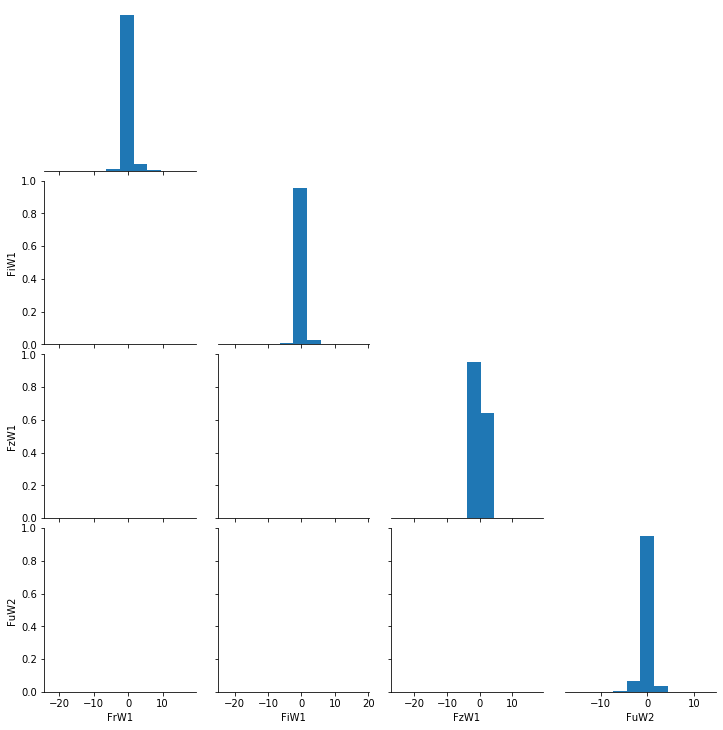

In [65]:
sns_plot = pairplot(df, corner=True, vars=[ 'FrW1', 'FiW1', 'FzW1', 'FuW2'], kind='kde')
sns_plot.savefig('rw1-iw1-zw1-uw1-scaled-kde-pair_plot.png', dpi=1800)